In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
## pas de limite de largeur maxi des colonnes affichées
pd.set_option('display.max_colwidth',None)
# pas de limite pour le nombre maxi de colonnes affichées
pd.set_option('display.max_columns', None ) 
# pas de limite pour le nombre maxi de lignes affichées
pd.set_option('display.max_rows', None )

In [3]:
## affiche le nombre de lignes , de colonnes , la taille totale , le nomnbre et le % de cellules manquantes

def cont(df):
    # nombre de lignes et colonnes
    nb_raw,nb_col=df.shape
    # nombre de valeurs manquantes
    val_na=df.isna().sum().sum()
    # % de données manquantes
    ratio_na=round(df.isna().sum().sum()/(nb_raw*nb_col)*100,2)
    print('taille totale du jeu de donnees :' ,nb_raw*nb_col)
    print() 
    print('nombre de lignes :',nb_raw,'                            nombre de colonnes :', nb_col)
    print()      
    print('nombre de valeurs manquantes :',val_na,'          % de valeurs manquantes :', ratio_na)
  

In [4]:
### print headmap avec les valeurs manquantes
def viz_na(df):
    plt.figure(figsize=(25,8))
    ax = sns.heatmap(df.isna(),cmap="Blues",cbar=False)
    plt.title('Visualisation des valeurs manquantes ',font='Arial',fontsize=24)
    plt.show()

In [5]:
### afficher le nombre de variables par type  et le pourcentage de chaque type

def type_var(df):
    print("Variables")
    print('---------')
    nb=df.dtypes.value_counts()
    nb_tot=nb.sum()
    pourcentage=round((100*nb/nb_tot),2)
    table=pd.concat([nb,pourcentage],axis=1)
    table.columns=[ 'Nombre' , '% ']
    display(table[table['Nombre']!=0]
    .sort_values('% ',ascending= False))

In [6]:
def missing_values(df):
    ''' affiche le pourcentage de valeurs manquantes par colonne trié en ordre descendant'''
            
    total = df.isnull().sum()
    percent = np.round(df.isnull().sum()/df.isnull().count()*100,2)
    missing_data = pd.concat([total, percent], 
                             axis=1, keys=['Total', '%']).sort_values('%', ascending=False)
    return missing_data

In [7]:
def correlation_matrice(df,corr_method):
    '''
pearson : standard correlation coefficient
kendall : Kendall Tau correlation coefficient
spearman :  Spearman rank correlation
''' 
    
    corr = df.corr(method=corr_method)
    
    mask=np.triu(np.ones_like(df.corr(),dtype=bool))
    sns.heatmap(df.corr(),mask=mask,center=0,cmap='RdBu',linewidths=1,annot=True,fmt='.2f',vmin=-1,vmax=1)
    plt.title('Heatmap des corrélations avec la méthode {}'.format(corr_method),fontsize=14,fontweight="bold")
    plt.show()

In [8]:
data=pd.read_csv(r'C:\Users\serge\OneDrive\Documents\Documents\DATA SCIENTIST\P4\2016_Building_Energy_Benchmarking.csv')

In [9]:
data.shape

(3376, 46)

In [10]:
data.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

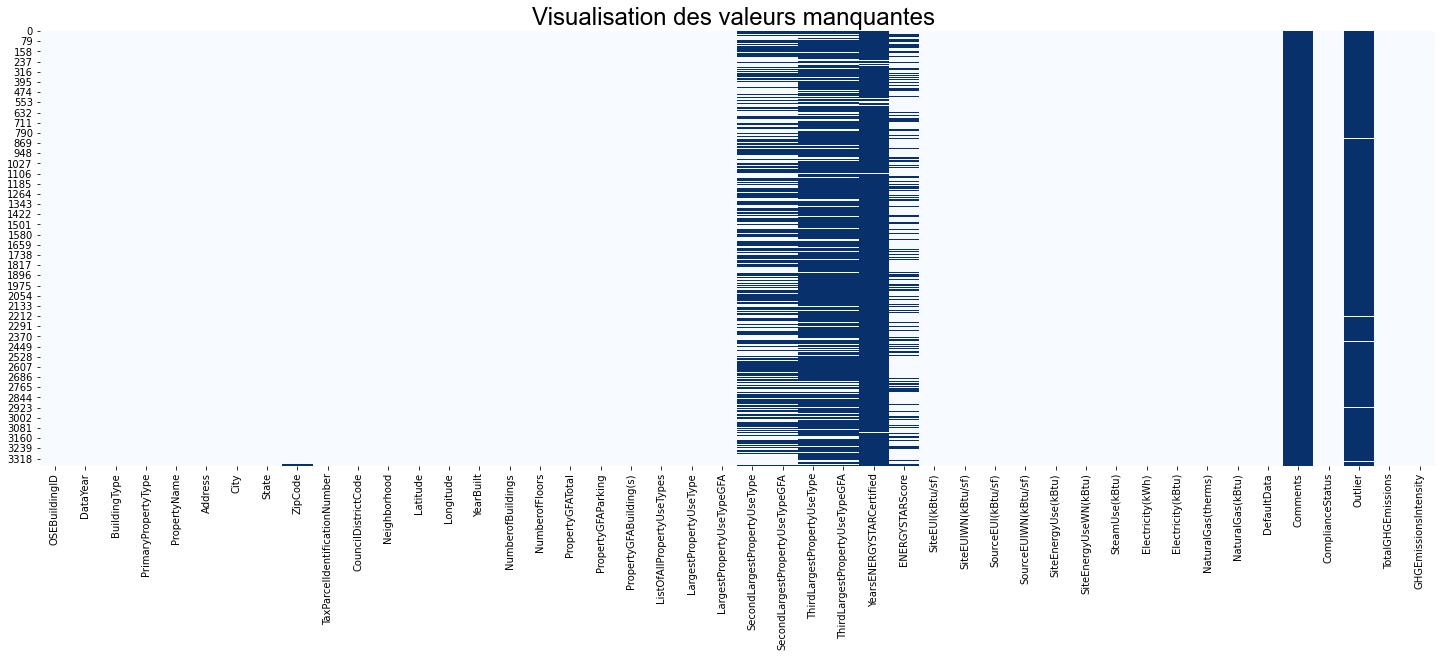

In [11]:
viz_na(data)

In [12]:
cont(data)

taille totale du jeu de donnees : 155296

nombre de lignes : 3376                             nombre de colonnes : 46

nombre de valeurs manquantes : 19952           % de valeurs manquantes : 12.85


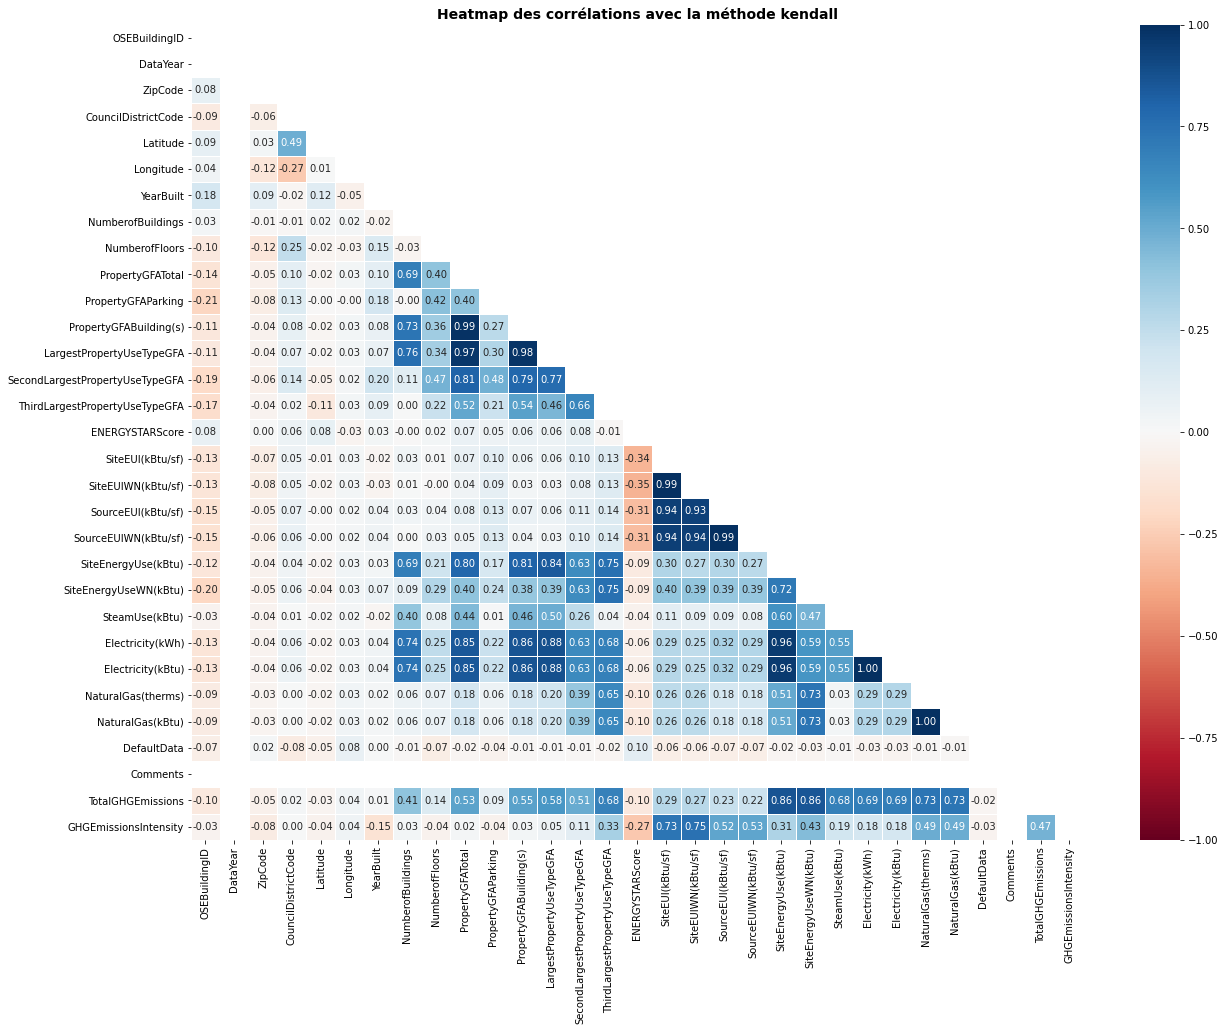

In [13]:
fig = plt.figure(figsize=(20,15))
correlation_matrice(data,'kendall')

In [14]:
missing_values(data)

Total       %
Comments                          3376  100.00
Outlier                           3344   99.05
YearsENERGYSTARCertified          3257   96.48
ThirdLargestPropertyUseType       2780   82.35
ThirdLargestPropertyUseTypeGFA    2780   82.35
SecondLargestPropertyUseType      1697   50.27
SecondLargestPropertyUseTypeGFA   1697   50.27
ENERGYSTARScore                    843   24.97
LargestPropertyUseTypeGFA           20    0.59
LargestPropertyUseType              20    0.59
ZipCode                             16    0.47
ListOfAllPropertyUseTypes            9    0.27
SourceEUIWN(kBtu/sf)                 9    0.27
SourceEUI(kBtu/sf)                   9    0.27
Electricity(kWh)                     9    0.27
Electricity(kBtu)                    9    0.27
NaturalGas(therms)                   9    0.27
NaturalGas(kBtu)                     9    0.27
TotalGHGEmissions                    9    0.27
SteamUse(kBtu)                       9    0.27
GHGEmissionsIntensity                9    0.27
NumberofBuildings                    8    0.24
SiteEUI(kBtu/sf)                     7    0.21
SiteEUIWN(kBtu/sf)                   6    0.18
SiteEnergyUseWN(kBtu)                6    0.18
SiteEnergyUse(kBtu)                  5    0.15
TaxParcelIdentificationNumber        0    0.00
BuildingType                         0    0.00
PrimaryPropertyType                  0    0.00
ComplianceStatus                     0    0.00
PropertyName                         0    0.00
DefaultData                          0    0.00
Address                              0    0.00
City                                 0    0.00
State                                0    0.00
PropertyGFABuilding(s)               0    0.00
CouncilDistrictCode                  0    0.00
PropertyGFAParking                   0    0.00
Neighborhood                         0    0.00
Latitude                             0    0.00
Longitude                            0    0.00
YearBuilt                            0    0.00
NumberofFloors                       0    0.00
PropertyGFATotal                     0    0.00
DataYear                             0    0.00
OSEBuildingID                        0    0.00

#### 1. Nous pouvons effacer la colonne Comments qui est vide

In [15]:
data.drop(columns=['Comments'],inplace=True)

In [16]:
data.describe(exclude=np.number)

BuildingType   PrimaryPropertyType     PropertyName  \
count             3376                  3376             3376   
unique               8                    24             3362   
top     NonResidential  Low-Rise Multifamily  Northgate Plaza   
freq              1460                   987                3   

                  Address     City State TaxParcelIdentificationNumber  \
count                3376     3376  3376                          3376   
unique               3354        1     1                          3268   
top     2600 SW Barton St  Seattle    WA                    1625049001   
freq                    4     3376  3376                             8   

       Neighborhood ListOfAllPropertyUseTypes LargestPropertyUseType  \
count          3376                      3367                   3356   
unique           19                       466                     56   
top        DOWNTOWN       Multifamily Housing    Multifamily Housing   
freq            573                       866                   1667   

       SecondLargestPropertyUseType ThirdLargestPropertyUseType  \
count                          1679                         596   
unique                           50                          44   
top                         Parking                Retail Store   
freq                            976                         110   

       YearsENERGYSTARCertified DefaultData ComplianceStatus      Outlier  
count                       119        3376             3376           32  
unique                       65           2                4            2  
top                        2016       False        Compliant  Low outlier  
freq                         14        3263             3211           23

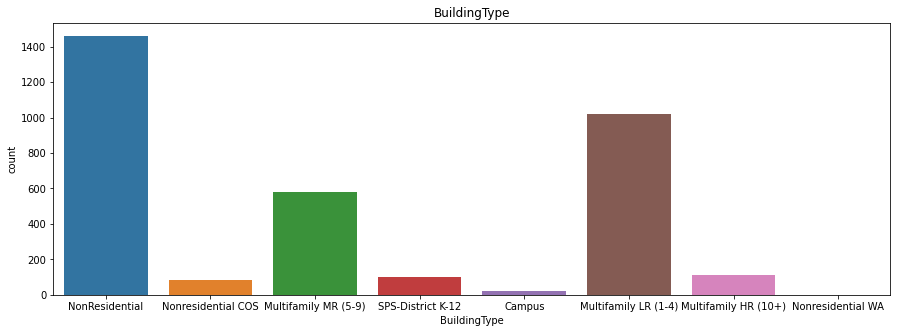

In [17]:
fig = plt.figure(figsize=(15,5))
sns.countplot( data['BuildingType'])
plt.title('BuildingType')
plt.show()

#### 2. On ne conserve que les bâtiments non-résidentiels

In [18]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Notre étude porte sur les batiments non résidentiels. je vais filtrer le jeu de données Nous conserverons:

NonResidential\
Nonresidential COS\
Nonresidential WA\
SPS-District K-12 (école maternelle et primaire)\
Campus : (ecole superieure)

In [19]:
filtre_non_res=('NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA')
data=data.loc[data['BuildingType'].isin(filtre_non_res)]

In [20]:
data.describe(include=np.number)

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    1668.000000    1668.0   1652.000000          1668.000000   
mean    16336.346523    2016.0  98116.819613             4.356715   
std     13835.292512       0.0     18.430353             2.191048   
min         1.000000    2016.0  98006.000000             1.000000   
25%       582.750000    2016.0  98105.000000             2.000000   
50%     21143.500000    2016.0  98109.000000             4.000000   
75%     24602.250000    2016.0  98125.000000             7.000000   
max     50226.000000    2016.0  98199.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  1668.000000  1668.000000  1668.000000        1666.000000   
mean     47.616054  -122.332908  1961.913669           1.168667   
std       0.048168     0.024580    32.741755           2.931409   
min      47.499170  -122.411820  1900.000000           0.000000   
25%      47.585458  -122.343280  1930.000000           1.000000   
50%      47.612340  -122.332935  1965.000000           1.000000   
75%      47.649675  -122.321675  1989.000000           1.000000   
max      47.733870  -122.258640  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1668.000000      1.668000e+03         1668.000000   
mean         4.121103      1.188427e+05        12897.979017   
std          6.563407      2.973622e+05        42274.511185   
min          0.000000      1.128500e+04            0.000000   
25%          1.000000      2.947775e+04            0.000000   
50%          2.000000      4.928950e+04            0.000000   
75%          4.000000      1.053250e+05            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.668000e+03               1.662000e+03   
mean             1.059447e+05               9.876469e+04   
std              2.842116e+05               2.767111e+05   
min              3.636000e+03               5.656000e+03   
25%              2.847525e+04               2.552750e+04   
50%              4.739150e+04               4.377050e+04   
75%              9.475975e+04               9.198375e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       855.000000                       353.00000   
mean                      36804.160581                     14923.13994   
std                       69845.261024                     36790.55656   
min                           0.000000                         0.00000   
25%                        5350.000000                      2663.00000   
50%                       12000.000000                      5931.00000   
75%                       31881.000000                     12941.00000   
max                      686750.000000                    459748.00000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      1094.000000       1665.000000         1665.000000   
mean         65.449726         72.158799           74.568529   
std          28.492928         74.048129           75.028403   
min           1.000000          0.000000            0.000000   
25%          48.000000         33.700001           35.400002   
50%          73.000000         51.900002           53.900002   
75%          89.000000         81.699997           85.199997   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1666.000000           1666.000000         1.666000e+03   
mean           175.829892            178.090876         8.437933e+06   
std            185.932121            185.918749         3.024380e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             76.450001             79.325003         1.229291e+06

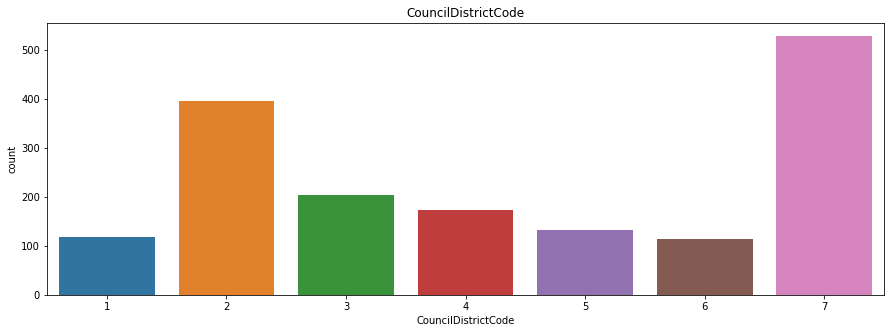

In [21]:
fig = plt.figure(figsize=(15,5))
sns.countplot( data['CouncilDistrictCode'])
plt.title('CouncilDistrictCode')
plt.show()

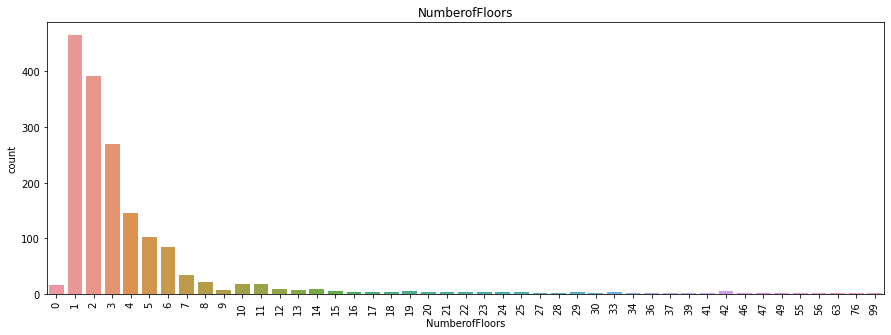

In [22]:
fig = plt.figure(figsize=(15,5))
sns.countplot( data['NumberofFloors'])
plt.title('NumberofFloors')
plt.xticks(rotation=90)
plt.show()

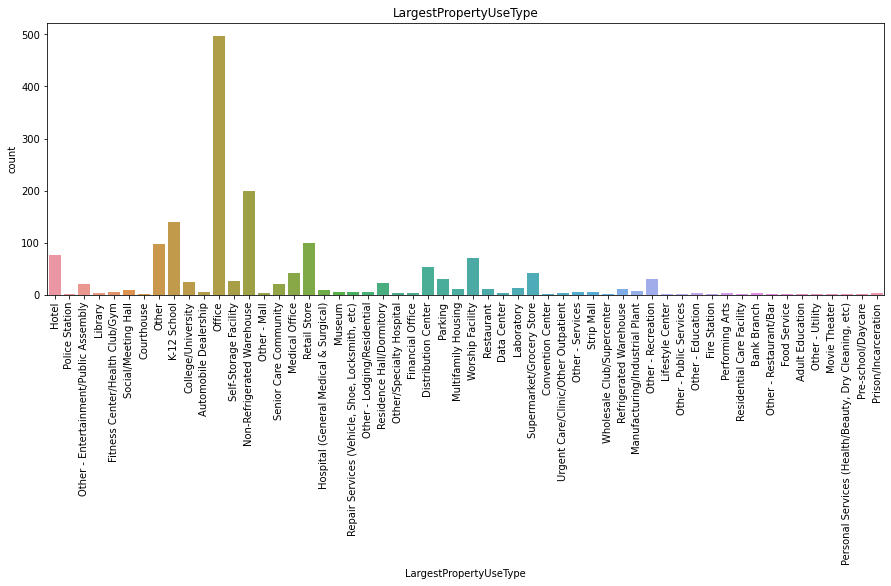

In [23]:
fig = plt.figure(figsize=(15,5))
sns.countplot( data['LargestPropertyUseType'])
plt.title('LargestPropertyUseType')
plt.xticks(rotation=90)
plt.show()

In [24]:
# affiche les lignes où LargestPropertyUseType a la valeur na
data[data['LargestPropertyUseType'].isna()]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
353             496      2016  NonResidential        Self-Storage Facility   
578             773      2016  NonResidential  Small- and Mid-Sized Office   
1147          21103      2016  NonResidential                        Hotel   
2414          25568      2016  NonResidential  Small- and Mid-Sized Office   
2459          25711      2016  NonResidential                   Restaurant   
2670          26532      2016  NonResidential           Mixed Use Property   

                          PropertyName                 Address     City State  \
353                   Market St Center   2811 NW Market Street  Seattle    WA   
578                   SEATTLE BUILDING         215 COLUMBIA ST  Seattle    WA   
1147                   Palladian Hotel      2000 Second Avenue  Seattle    WA   
2414               Talon Northlake LLC    1341 N Northlake Way  Seattle    WA   
2459  BUSH GARDEN - RESTURANT & LOUNGE     614 S MAYNARD AVE S  Seattle    WA   
2670                  KALBERG BUILDING  4515 UNIVERSITY WAY NE  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
353   98107.0                    1175001235                    6      BALLARD   
578   98104.0                    0939000245                    7     DOWNTOWN   
1147  98121.0                    1977201140                    7     DOWNTOWN   
2414  98103.0                    4088804565                    4   LAKE UNION   
2459  98104.0                    5247802410                    2     DOWNTOWN   
2670  98105.0                    8816401120                    4    NORTHEAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
353   47.66838 -122.39310       1946                2.0               2   
578   47.60380 -122.33293       1924                NaN               4   
1147  47.61203 -122.34165       1910                1.0               8   
2414  47.64747 -122.34086       2008                1.0               4   
2459  47.59697 -122.32474       1913                1.0               3   
2670  47.66182 -122.31345       1928                NaN               2   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
353             111445                   0                  111445   
578              63150                   0                   63150   
1147             61721                   0                   61721   
2414             48350                   0                   48350   
2459             28800                   0                   28800   
2670             20760                   0                   20760   

                                                                                                                                                                                                                                            ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other - Education, Other - Recreation, Other - Restaurant/Bar, Outpatient Rehabilitation/Physical Therapy, Personal Services (Health/Beauty, Dry Cleaning, etc), Restaurant, Retail Store, Self-Storage Facility, Vocat   
578                                                                                                                                                                                                                                                               NaN   
1147                                                                                                                                                                                                                                                            Hotel   
2414                                                                                                                                                                                                                                                  

In [25]:
data['LargestPropertyUseType'] = np.where(data.LargestPropertyUseType.notna(),data.LargestPropertyUseType , data.PrimaryPropertyType)

In [26]:
# vérifier qu'il n'y a plus de na
data[data['LargestPropertyUseType'].isna()]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

In [27]:
sorted(data.BuildingType.unique())

['Campus',
 'NonResidential',
 'Nonresidential COS',
 'Nonresidential WA',
 'SPS-District K-12']

In [28]:
sorted(data.PrimaryPropertyType.unique())

['Distribution Center',
 'Hospital',
 'Hotel',
 'K-12 School',
 'Laboratory',
 'Large Office',
 'Low-Rise Multifamily',
 'Medical Office',
 'Mixed Use Property',
 'Office',
 'Other',
 'Refrigerated Warehouse',
 'Residence Hall',
 'Restaurant',
 'Retail Store',
 'Self-Storage Facility',
 'Senior Care Community',
 'Small- and Mid-Sized Office',
 'Supermarket / Grocery Store',
 'University',
 'Warehouse',
 'Worship Facility']

#### Il y a encore une valeur résidentielle : Low-Rise Multifamily

In [29]:
data[data['PrimaryPropertyType']=='Low-Rise Multifamily']

OSEBuildingID  DataYear    BuildingType   PrimaryPropertyType  \
644           19445      2016  NonResidential  Low-Rise Multifamily   
1300          21481      2016          Campus  Low-Rise Multifamily   
2450          25674      2016  NonResidential  Low-Rise Multifamily   

                PropertyName             Address     City State  ZipCode  \
644           Pacific Pointe  2108 N Pacific St.  Seattle    WA  98103.0   
1300         Sanitary Market   1525 FIrst Avenue  Seattle    WA  98101.0   
2450  (ID25674) COMET TAVERN       916 E PIKE ST  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
644                     0354000254                    4   LAKE UNION   
1300                    1976200210                    7     DOWNTOWN   
2450                    6003500480                    3         EAST   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
644   47.64859 -122.33311       2000                1.0               3   
1300  47.60918 -122.34079       1942                1.0               4   
2450  47.61427 -122.31977       1910                1.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
644              93079               36093                   56986   
1300             45500                   0                   45500   
2450             32100                   0                   32100   

                                                                            ListOfAllPropertyUseTypes  \
644                                                                               Multifamily Housing   
1300  Bar/Nightclub, Food Sales, Multifamily Housing, Restaurant, Retail Store, Self-Storage Facility   
2450                                                               Bar/Nightclub, Multifamily Housing   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
644     Multifamily Housing                    91064.0   
1300    Multifamily Housing                    22669.0   
2450    Multifamily Housing                    21400.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
644                           NaN                              NaN   
1300                 Retail Store                          10455.0   
2450                Bar/Nightclub                          10700.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
644                          NaN                             NaN   
1300                  Restaurant                          3668.0   
2450                         NaN                             NaN   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
644                       NaN             32.0         21.900000   
1300                      NaN              NaN         85.199997   
2450                      NaN              NaN          3.400000   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
644            23.000000           63.099998             65.099998   
1300           85.199997          267.500000            267.500000   
2450            4.500000            4.300000              5.400000   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
644          1.997182e+06            2090011.625             0.0   
1300         3.778355e+06            3778355.000             0.0   
2450         1.082004e+05             142892.500             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
644       5.111956e+05          1744199.0         2529.819824   
1300      1.107372e+06          3778355.0            0.000000   
2450      3.332500e+03            11370.0          968.300171   

      NaturalGas(kBtu)  DefaultData ComplianceStatus      Outlier  \
644           252982.0        False        Compliant          NaN   
1300               0.0        False        Compliant          NaN   
2450           96830.0        False    Non

#### Ces 3 batiments ont un usage principal résidentiel.Il s'agit de construction à 2 niveaux. Le rez de chaussée est un commerce et les 2 étages sont des logements résidentiels. Donc je ne vais pas les conserver 

In [30]:
data=data[data['PrimaryPropertyType']!='Low-Rise Multifamily']

In [31]:
data.LargestPropertyUseType.unique()

array(['Hotel', 'Police Station', 'Other - Entertainment/Public Assembly',
       'Library', 'Fitness Center/Health Club/Gym', 'Social/Meeting Hall',
       'Courthouse', 'Other', 'K-12 School', 'College/University',
       'Automobile Dealership', 'Office', 'Self-Storage Facility',
       'Non-Refrigerated Warehouse', 'Other - Mall',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital (General Medical & Surgical)', 'Museum',
       'Repair Services (Vehicle, Shoe, Locksmith, etc)',
       'Other - Lodging/Residential', 'Residence Hall/Dormitory',
       'Other/Specialty Hospital', 'Financial Office',
       'Distribution Center', 'Parking', 'Multifamily Housing',
       'Worship Facility', 'Restaurant', 'Data Center', 'Laboratory',
       'Supermarket/Grocery Store', 'Convention Center',
       'Urgent Care/Clinic/Other Outpatient', 'Other - Services',
       'Strip Mall', 'Wholesale Club/Supercenter',
       'Refrigerated Warehouse', 'Manufacturing/Indu

In [32]:
data.shape

(1665, 45)

#### 3. il y a des valeurs négatives  sur des consommations et des émissions

In [33]:
# afficher les lignes pour lesquelles 'SourceEUIWN(kBtu/sf ou TotalGHGEmissions sont inférieures à 0
data.loc[(data['SourceEUIWN(kBtu/sf)']<0)|(data['TotalGHGEmissions']<0)]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3206          49784      2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address     City State  ZipCode  \
3206  Bullitt Center  1501 E. Madison St.  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3206                    7234600195                    3      CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3206  47.61432 -122.31257       2013                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3206             52000                   0                   52000   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3206                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3206                    48159.0                          NaN   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3206                              NaN                         NaN   

      ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  \
3206                             NaN                      NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
3206            100.0               7.1                 5.0   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
3206                 2.0                  -2.1          342726.0938   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
3206            240132.0938             0.0      -33826.80078   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  DefaultData  \
3206          -115417.0                 0.0               0.0        False   

     ComplianceStatus Outlier  TotalGHGEmissions  GHGEmissionsIntensity  
3206        Compliant     NaN               -0.8                  -0.02

In [34]:
# supprimer lignes pour lesquelles 'SourceEUIWN(kBtu/sf ou TotalGHGEmissions sont inférieures à 0
data=data.loc[~(data['SourceEUIWN(kBtu/sf)']<0)|~(data['TotalGHGEmissions']<0)]

#### 4. Il y a des lignes qui n'ont pas de batiments construits ( NumberofBuilding =0)

In [35]:
data[data['NumberofBuildings']==0].count()['OSEBuildingID']

52

In [36]:
data[data['NumberofBuildings']==0].sample(5)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3205          49783      2016  NonResidential                   Laboratory   
1256          21365      2016  NonResidential               Medical Office   
2564          26119      2016  NonResidential                 Retail Store   
2214          24822      2016  NonResidential  Small- and Mid-Sized Office   
2407          25546      2016  NonResidential           Mixed Use Property   

                                   PropertyName  \
3205                      UW Medicine Phase 3.1   
1256            Northwest Kidney Center (21365)   
2564                     517 E Pike St Building   
2214                          1943 First Avenue   
2407  Compass Housing Alliance - Pioneer Square   

                                      Address     City State  ZipCode  \
3205                    750 Republican Street  Seattle    WA  98109.0   
1256                             700 Broadway  Seattle    WA  98114.0   
2564              517 E Pike St   Upper Level  Seattle    WA  98122.0   
2214                    1943 1st Avenue South  Seattle    WA  98134.0   
2407  210 Alaskan Way S / 77 S. Washington St  Seattle    WA  98104.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode      Neighborhood  \
3205                    1988201435                    7        LAKE UNION   
1256                    1978201435                    3              EAST   
2564                    8804900910                    3              EAST   
2214                    7666207160                    2  GREATER DUWAMISH   
2407                    5247800080                    7          DOWNTOWN   

       Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3205  47.623510 -122.34135       2013                0.0               8   
1256  47.608654 -122.32059       1963                0.0               3   
2564  47.613860 -122.32481       1910                0.0               2   
2214  47.584620 -122.33470       1910                0.0               3   
2407  47.600500 -122.33514       2005                0.0               5   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3205            339591              114010                  225581   
1256             39115                   0                   39115   
2564             24750                   0                   24750   
2214             49052                   0                   49052   
2407             57600                   0                   57600   

                                                     ListOfAllPropertyUseTypes  \
3205                Convenience Store without Gas Station, Laboratory, Parking   
1256                                                            Medical Office   
2564                                      Medical Office, Office, Retail Store   
2214                                                      Office, Retail Store   
2407  Financial Office, Multifamily Housing, Parking, Residence Hall/Dormitory   

        LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3205                Laboratory                   172793.0   
1256            Medical Office                    50000.0   
2564              Retail Store                    19240.0   
2214                    Office                    32393.0   
2407  Residence Hall/Dormitory                    27600.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3205                      Parking                         139241.0   
1256                          NaN                              NaN   
2564                       Office                           2050.0   
2214                 Retail Store                          10057.0   
2407          Multifamily Housing                          16000.0   

                ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3205  Convenience Store without Gas Station                           294.0   
1256       

#### Je conserve ces lignes car les autres variables sont correctement complétées ( nombre étages, surface,consommation...)
#### Je vais supprimer cette variable pour la suite

In [37]:
data.drop(columns=['NumberofBuildings'],inplace=True)

#### 5. Outliers et Compliance et ListOfAllPropertyUseTypes

     Outliers : je vais enlever les lignes qui sont des outliers
     
     ComplianceStatus : je vais enlever les lignes =='Error - Correct Default Data' (la propriété a satisfait aux exigences d analyse comparative energétique l'année de la déclaration) 
     
    ListOfAllPropertyUseTypes:champs explicatif .Je vais le supprimer

In [38]:
data[data['Outlier'].notna()]['Outlier'].count()

16

In [39]:
data=data[~data['Outlier'].notna()]

In [40]:
# on peut à présent supprimer la colonne Outlier
data.drop(columns=['Outlier'],inplace=True)

In [41]:
data[data['ComplianceStatus']=='Error - Correct Default Data'].count()['ComplianceStatus']

86

In [42]:
# on conserve les lignes pour lesquelles le ComplianceStatus est différent de Error...
data=data[data['ComplianceStatus']!='Error - Correct Default Data']

In [43]:
# on peut à présent supprimer la colonne ComplianceStatus
data.drop(columns=['ComplianceStatus'],inplace=True)

In [44]:
data['ListOfAllPropertyUseTypes'].unique()

array(['Hotel', 'Hotel, Parking, Restaurant',
       'Hotel, Parking, Swimming Pool', 'Police Station',
       'Other - Entertainment/Public Assembly', 'Hotel, Parking',
       'Data Center, Library, Parking',
       'Fitness Center/Health Club/Gym, Office, Swimming Pool',
       'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
       'Courthouse', 'Other', 'College/University',
       'Automobile Dealership',
       'Hotel, Parking, Retail Store, Swimming Pool', 'K-12 School',
       'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
       'Self-Storage Facility',
       'Energy/Power Station, Laboratory, Manufacturing/Industrial Plant, Non-Refrigerated Warehouse, Office',
       'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
       'Non-Refrigerated Warehouse, Office', 'Office, Other - Education',
       'Office, Self-Storage Facility, Vocational School',
       'Data Center, Office, Retail Store',
       '

In [45]:
# supprimer la colonne ListOfAllPropertyUseTypes
data.drop(columns=['ListOfAllPropertyUseTypes'],inplace=True)

In [46]:
data.shape

(1562, 41)

#### 6. Variables informatives non retenues pour la suite de l'analyse 
    OSEBuildingID le numéro d'identification de l'immeuble
    DataYear : une seule année 2016
    PropertyName : le nom de l'immeuble
    Address  
    City : Seattle
    State 
    ZipCode
    TaxParcelIdentificationNumber
    CouncilDistrictCode
    YearsENERGYSTARCertified
    DefaultData
    

In [47]:
data.drop(columns=['OSEBuildingID','DataYear','PropertyName','Address','City','State','ZipCode'
                   ,'TaxParcelIdentificationNumber','CouncilDistrictCode','YearsENERGYSTARCertified','DefaultData'],inplace =True)

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1562 entries, 0 to 3375
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1562 non-null   object 
 1   PrimaryPropertyType              1562 non-null   object 
 2   Neighborhood                     1562 non-null   object 
 3   Latitude                         1562 non-null   float64
 4   Longitude                        1562 non-null   float64
 5   YearBuilt                        1562 non-null   int64  
 6   NumberofFloors                   1562 non-null   int64  
 7   PropertyGFATotal                 1562 non-null   int64  
 8   PropertyGFAParking               1562 non-null   int64  
 9   PropertyGFABuilding(s)           1562 non-null   int64  
 10  LargestPropertyUseType           1562 non-null   object 
 11  LargestPropertyUseTypeGFA        1556 non-null   float64
 12  SecondLargestPropert

####7. Vérifions si PropertyGFABuilding(s) =PropertyGFATotal - PropertyGFAParking

In [49]:
data['Buiding_are_calc']=data['PropertyGFATotal']-data['PropertyGFAParking']

In [50]:
data[['PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','Buiding_are_calc']].sample(5)

PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
1255             45780               11400                   34380   
614              52924                   0                   52924   
2314           1074552              112124                  962428   
167             597519                   0                  597519   
347              88062               20826                   67236   

      Buiding_are_calc  
1255             34380  
614              52924  
2314            962428  
167             597519  
347              67236

In [51]:
# Vérifions si c'est vrai pour toutes les lignes
data[data['PropertyGFABuilding(s)']!=data['Buiding_are_calc']]

Empty DataFrame
Columns: [BuildingType, PrimaryPropertyType, Neighborhood, Latitude, Longitude, YearBuilt, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), TotalGHGEmissions, GHGEmissionsIntensity, Buiding_are_calc]
Index: []

On peut calculer le ratio de surface de parking par rapport à la surface totale

In [52]:
data['ratio_parking']=data['PropertyGFAParking']/data['PropertyGFATotal']

On peut retirer PropertyGFATotal et PropertyGFAParking

In [53]:
data.drop(columns=['PropertyGFATotal','PropertyGFAParking','Buiding_are_calc'],inplace=True)

#### 7. ajout d'une colonne Buiding_age en remplacement de la variable YearBuilt

In [54]:
data['Building_age']=2016-data['YearBuilt']
data.drop(columns=['YearBuilt'],inplace=True)

In [55]:
data['tranche_age'] = pd.cut(data['Building_age'], 
    bins=[x for x in range(0,120, 10)], 
    right=True)

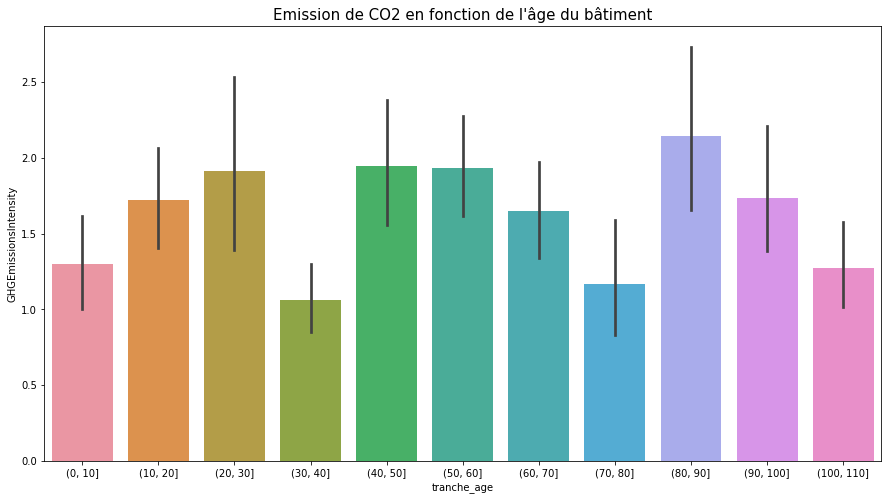

In [56]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'tranche_age', y= "GHGEmissionsIntensity", data=data)
plt.title("Emission de CO2 en fonction de l'âge du bâtiment", fontsize=15)
plt.show()

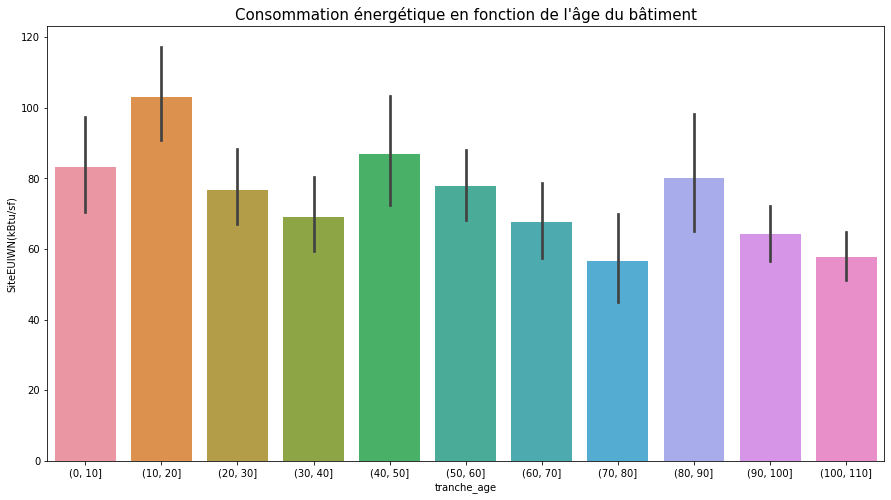

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'tranche_age', y= "SiteEUIWN(kBtu/sf)", data=data)
plt.title("Consommation énergétique en fonction de l'âge du bâtiment", fontsize=15)
plt.show()

#### Sur ce graphique on constate que les batiments les plus récents ont une consommation/sf supérieure à la consommation des batiments plus anciens.Une explication serait que les batiments plus anciens ont subi des rénovations énergétiques et présentent dès lors de meilleures performances.

In [58]:
data.drop(columns=['tranche_age'],inplace=True)

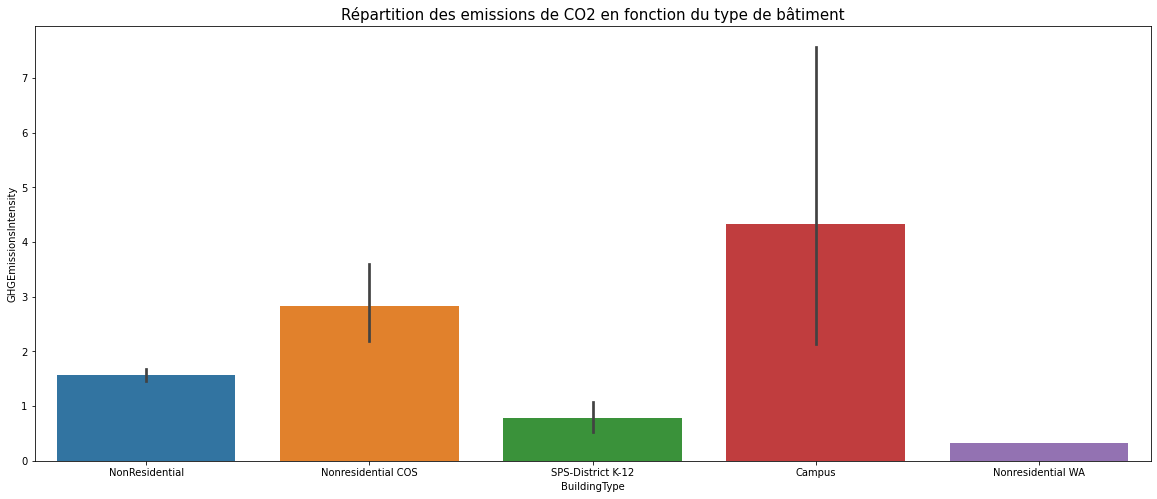

In [59]:
plt.figure(figsize=(20,8))
sns.barplot("BuildingType", y= "GHGEmissionsIntensity", data=data)
plt.title("Répartition des emissions de CO2 en fonction du type de bâtiment", fontsize=15)
plt.show()

Les campus ont les émissions de gaz les plus importantes

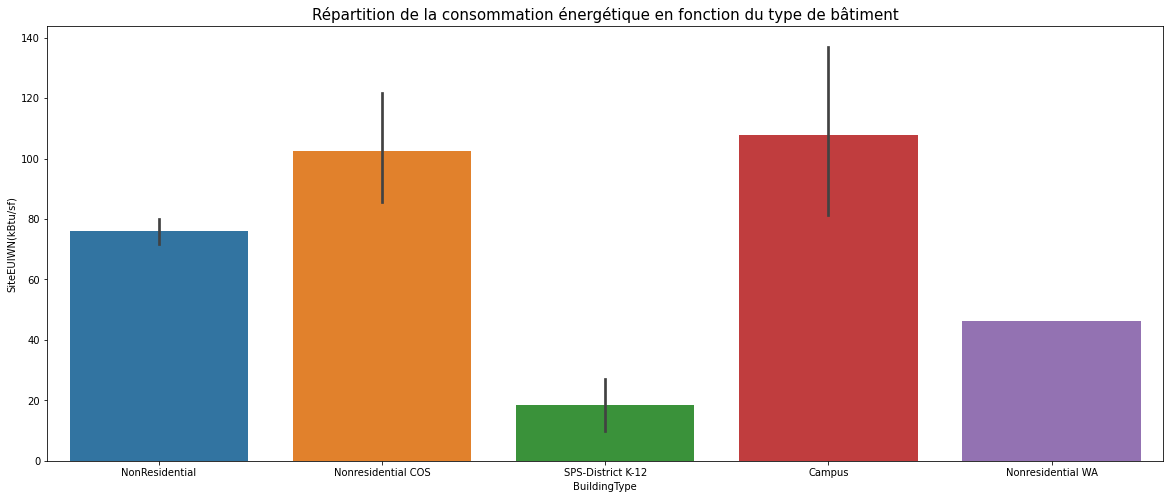

In [60]:
plt.figure(figsize=(20,8))
sns.barplot("BuildingType", y= "SiteEUIWN(kBtu/sf)", data=data)
plt.title("Répartition de la consommation énergétique en fonction du type de bâtiment", fontsize=15)
plt.show()

Le graphique comparatif confirme que les campus ont également la consommation énérgétique la plus importante. 

In [61]:
missing_values(data)

Total      %
ThirdLargestPropertyUseTypeGFA    1215  77.78
ThirdLargestPropertyUseType       1215  77.78
SecondLargestPropertyUseTypeGFA    720  46.09
SecondLargestPropertyUseType       720  46.09
ENERGYSTARScore                    567  36.30
LargestPropertyUseTypeGFA            6   0.38
SiteEUIWN(kBtu/sf)                   3   0.19
SiteEUI(kBtu/sf)                     3   0.19
SiteEnergyUseWN(kBtu)                3   0.19
Electricity(kBtu)                    2   0.13
NaturalGas(therms)                   2   0.13
SteamUse(kBtu)                       2   0.13
NaturalGas(kBtu)                     2   0.13
TotalGHGEmissions                    2   0.13
GHGEmissionsIntensity                2   0.13
Electricity(kWh)                     2   0.13
SourceEUI(kBtu/sf)                   2   0.13
SourceEUIWN(kBtu/sf)                 2   0.13
SiteEnergyUse(kBtu)                  2   0.13
ratio_parking                        0   0.00
BuildingType                         0   0.00
PrimaryPropertyType                  0   0.00
LargestPropertyUseType               0   0.00
PropertyGFABuilding(s)               0   0.00
NumberofFloors                       0   0.00
Longitude                            0   0.00
Latitude                             0   0.00
Neighborhood                         0   0.00
Building_age                         0   0.00

#### 8 .Les valeurs manquantes

Regardons les 2 lignes avec une valeur manquante pour TotalGHGEmissions . Ce sont ces mêmes lignes qui ont les valeurs manquantes sur l'ensemble des colonnes ayant trait à l'energie ou à l'emission. Je supprime ces 2 lignes

In [62]:
data.loc[data['TotalGHGEmissions'].isna()]

BuildingType          PrimaryPropertyType Neighborhood  Latitude  \
578   NonResidential  Small- and Mid-Sized Office     DOWNTOWN  47.60380   
2670  NonResidential           Mixed Use Property    NORTHEAST  47.66182   

      Longitude  NumberofFloors  PropertyGFABuilding(s)  \
578  -122.33293               4                   63150   
2670 -122.31345               2                   20760   

           LargestPropertyUseType  LargestPropertyUseTypeGFA  \
578   Small- and Mid-Sized Office                        NaN   
2670           Mixed Use Property                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
578                           NaN                              NaN   
2670                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
578                          NaN                             NaN   
2670                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
578               NaN               NaN                 NaN   
2670              NaN               NaN                 NaN   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
578                  NaN                   NaN                  NaN   
2670                 NaN                   NaN                  NaN   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
578                     NaN             NaN               NaN   
2670                    NaN             NaN               NaN   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
578                 NaN                 NaN               NaN   
2670                NaN                 NaN               NaN   

      TotalGHGEmissions  GHGEmissionsIntensity  ratio_parking  Building_age  
578                 NaN                    NaN            0.0            92  
2670                NaN                    NaN            0.0            88

In [63]:
data=data[~data['TotalGHGEmissions'].isna()]

Intéressons nous aux 4 lignes nan pour la variable LargestPropertyUseTypeGFA

In [64]:
data.loc[data['LargestPropertyUseTypeGFA'].isna()]

BuildingType          PrimaryPropertyType Neighborhood  Latitude  \
353   NonResidential        Self-Storage Facility      BALLARD  47.66838   
1147  NonResidential                        Hotel     DOWNTOWN  47.61203   
2414  NonResidential  Small- and Mid-Sized Office   LAKE UNION  47.64747   
2459  NonResidential                   Restaurant     DOWNTOWN  47.59697   

      Longitude  NumberofFloors  PropertyGFABuilding(s)  \
353  -122.39310               2                  111445   
1147 -122.34165               8                   61721   
2414 -122.34086               4                   48350   
2459 -122.32474               3                   28800   

           LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353         Self-Storage Facility                        NaN   
1147                        Hotel                        NaN   
2414  Small- and Mid-Sized Office                        NaN   
2459                   Restaurant                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                           NaN                              NaN   
1147                          NaN                              NaN   
2414                          NaN                              NaN   
2459                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                          NaN                             NaN   
1147                         NaN                             NaN   
2414                         NaN                             NaN   
2459                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
353               NaN         47.799999           51.000000   
1147             93.0         52.200001           53.500000   
2414             45.0         72.199997           74.699997   
2459              NaN         31.200001           32.500000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
353           103.000000            106.400002         5.697472e+06   
1147          150.399994            154.399994         2.897080e+06   
2414          226.600006            234.600006         3.168131e+06   
2459           62.000000             62.799999         8.999242e+05   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
353            6.076957e+06             0.0       881452.0000   
1147           2.968430e+06             0.0       742846.3750   
2414           3.280956e+06             0.0       928526.0000   
2459           9.358332e+05             0.0       118085.2969   

      Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
353           3007514.0        26899.582030         2689958.0   
1147          2534592.0         3624.875244          362488.0   
2414          3168131.0            0.000000               0.0   
2459           402907.0         4970.169922          497017.0   

      TotalGHGEmissions  GHGEmissionsIntensity  ratio_parking  Building_age  
353              163.83                   1.47            0.0            70  
1147              36.92                   0.60            0.0           106  
2414              22.09                   0.46            0.0             8  
2459              29.21                   1.01            0.0           103

on peut considérer que cette surface est égale à la surface de PropertyGFABuilding(s)

In [65]:
data['LargestPropertyUseTypeGFA']= np.where(data.LargestPropertyUseTypeGFA.notna(),data.LargestPropertyUseTypeGFA ,
                                            data['PropertyGFABuilding(s)'])

Pour ces variables on peut considérer qu'il ny' a pas de seconde ni de 3eme utilisation. Je remplace les nan par 0.

SecondLargestPropertyUseType   
SecondLargestPropertyUseTypeGFA
ThirdLargestPropertyUseType   
ThirdLargestPropertyUseTypeGFA   

In [66]:
fill_=['SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA'] 

In [67]:
for col in fill_:
    data[col]=data[col].fillna(0)

In [68]:
missing_values(data)

Total      %
ENERGYSTARScore                    565  36.22
SiteEUI(kBtu/sf)                     1   0.06
SiteEUIWN(kBtu/sf)                   1   0.06
SiteEnergyUseWN(kBtu)                1   0.06
ratio_parking                        0   0.00
GHGEmissionsIntensity                0   0.00
TotalGHGEmissions                    0   0.00
NaturalGas(kBtu)                     0   0.00
NaturalGas(therms)                   0   0.00
Electricity(kBtu)                    0   0.00
Electricity(kWh)                     0   0.00
SteamUse(kBtu)                       0   0.00
SiteEnergyUse(kBtu)                  0   0.00
SourceEUIWN(kBtu/sf)                 0   0.00
SourceEUI(kBtu/sf)                   0   0.00
BuildingType                         0   0.00
PrimaryPropertyType                  0   0.00
ThirdLargestPropertyUseTypeGFA       0   0.00
ThirdLargestPropertyUseType          0   0.00
SecondLargestPropertyUseTypeGFA      0   0.00
SecondLargestPropertyUseType         0   0.00
LargestPropertyUseTypeGFA            0   0.00
LargestPropertyUseType               0   0.00
PropertyGFABuilding(s)               0   0.00
NumberofFloors                       0   0.00
Longitude                            0   0.00
Latitude                             0   0.00
Neighborhood                         0   0.00
Building_age                         0   0.00

In [69]:
data=data[~data['SiteEnergyUseWN(kBtu)'].isna()]

#### 9. Variables consommation énergie et émission de gaz

              Consommation énergétique : 'SiteEnergyUseWN(kBtu)'
              Emissions : 'TotalGHGEmissions'

<Axes: xlabel='GHGEmissionsIntensity', ylabel='SiteEUIWN(kBtu/sf)'>

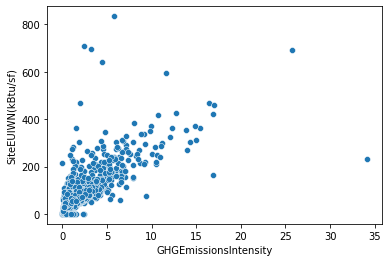

In [70]:
sns.scatterplot(data=data,x='GHGEmissionsIntensity',y='SiteEUIWN(kBtu/sf)')

#### 10. les distributions relatives aux consommations et aux émissions sont asymétriques . elles ne suivent pas une loi normale.Nous allons transformer la variable consommation en distribution normale en utilisant la fonction log 

In [71]:
data['SiteEnergyUseWN(kBtu)'].skew()

11.003334946782276

In [72]:
data['TotalGHGEmissions'].skew()

13.768846487764106

> Les distributions sont fortement étalées à droite 

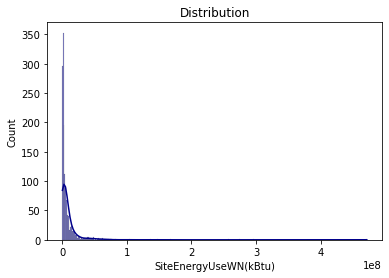

In [73]:
sns.histplot(data['SiteEnergyUseWN(kBtu)'], kde = True, color='Darkblue')
plt.title("Distribution")
plt.show()

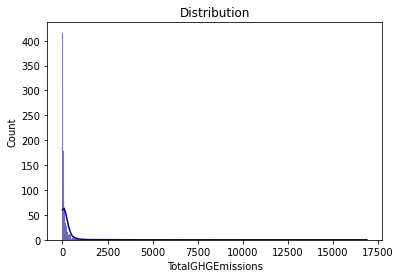

In [74]:
sns.histplot(data['TotalGHGEmissions'], kde = True, color='Darkblue')
plt.title("Distribution")
plt.show()

In [75]:
data=data[data['SiteEnergyUseWN(kBtu)']!=0]

In [76]:
data['log_consommation']=np.log10(1+data['SiteEnergyUseWN(kBtu)'])

In [77]:
data['log_consommation'].var()

0.3125663403393069

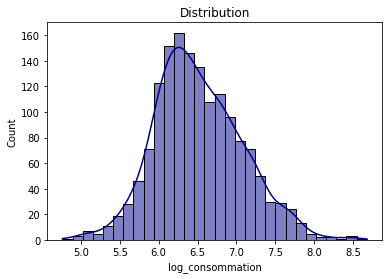

In [78]:
sns.histplot(data['log_consommation'], kde = True, color='Darkblue')
plt.title("Distribution")
plt.show()

In [79]:
data['TotalGHGEmissions'].describe()

count     1535.000000
mean       186.797707
std        730.395124
min          0.000000
25%         20.550000
50%         49.900000
75%        146.965000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

In [80]:
data=data[data['TotalGHGEmissions']!=0]

In [81]:
data['log_emission']=np.log10(1+data['TotalGHGEmissions'])

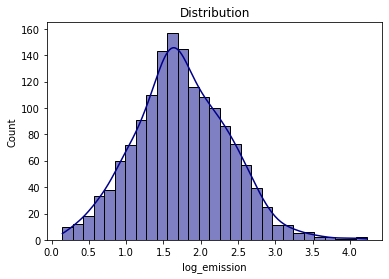

In [82]:
sns.histplot(data['log_emission'], kde = True, color='Darkblue')
plt.title("Distribution")
plt.show()

In [83]:
#%pip install folium

In [84]:
import folium
import folium.plugins
#Coordonnées du centre de Seattle
seattle_lat = 47.603832
seattle_lon = -122.330062
seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

#Clusters
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 3375
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1534 non-null   object 
 1   PrimaryPropertyType              1534 non-null   object 
 2   Neighborhood                     1534 non-null   object 
 3   Latitude                         1534 non-null   float64
 4   Longitude                        1534 non-null   float64
 5   NumberofFloors                   1534 non-null   int64  
 6   PropertyGFABuilding(s)           1534 non-null   int64  
 7   LargestPropertyUseType           1534 non-null   object 
 8   LargestPropertyUseTypeGFA        1534 non-null   float64
 9   SecondLargestPropertyUseType     1534 non-null   object 
 10  SecondLargestPropertyUseTypeGFA  1534 non-null   float64
 11  ThirdLargestPropertyUseType      1534 non-null   object 
 12  ThirdLargestProperty

In [86]:
cols_drop=['SiteEUI(kBtu/sf)',
            'SiteEUIWN(kBtu/sf)',
            'SourceEUI(kBtu/sf)',
            'SourceEUIWN(kBtu/sf)',
             'Electricity(kWh)',
            'NaturalGas(therms)',
            'GHGEmissionsIntensity'
                   ]

In [87]:
data.drop(columns=cols_drop,inplace=True)

On calcule également le ratio pour chaque type d'énergie.

In [88]:
data['SteamUse_ratio']=data['SteamUse(kBtu)']/data['SiteEnergyUse(kBtu)']
data['Electricity_ratio']=data['Electricity(kBtu)']/data['SiteEnergyUse(kBtu)']
data['NaturalGas_ratio']=data['NaturalGas(kBtu)']/data['SiteEnergyUse(kBtu)']


In [89]:
data.drop(columns=['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','SiteEnergyUse(kBtu)'],inplace=True)

In [90]:
colonnes_numer =data.select_dtypes(['int64','float64']).columns

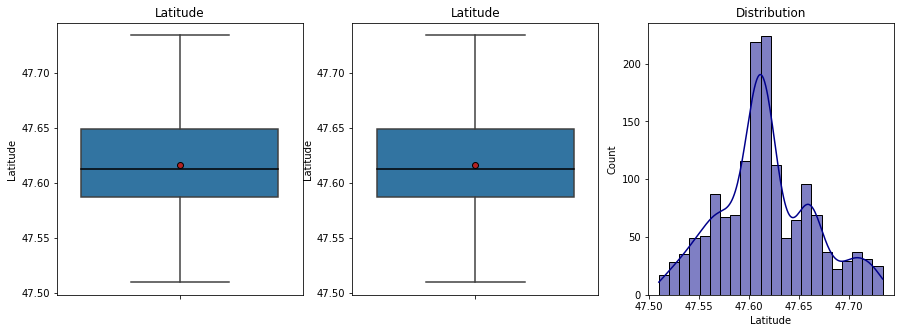

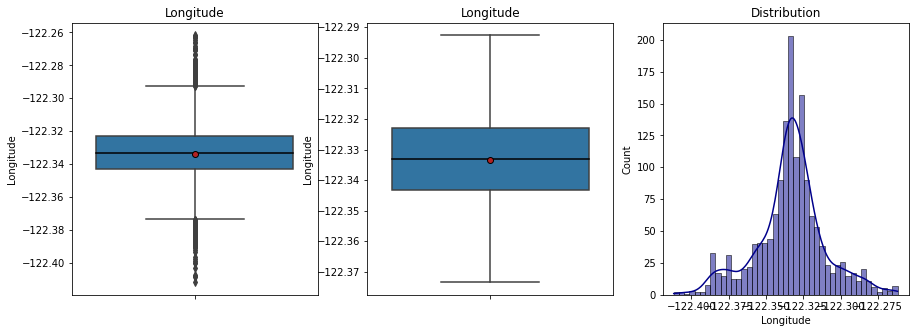

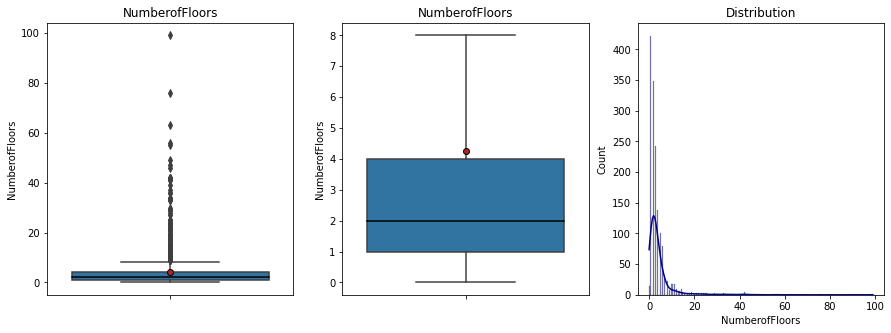

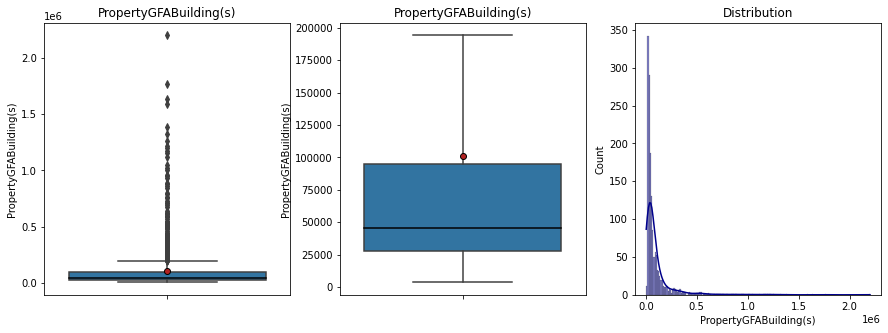

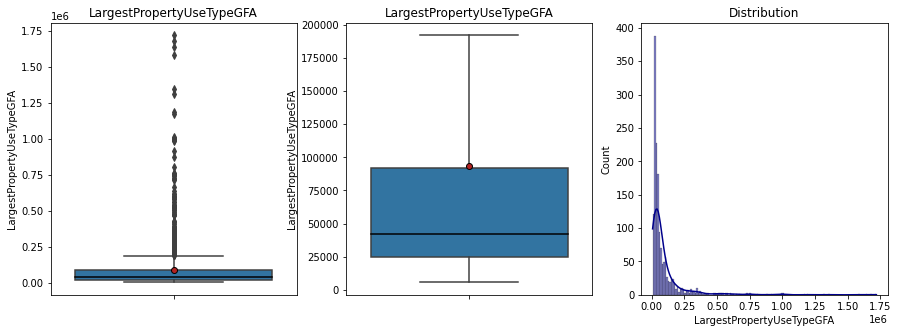

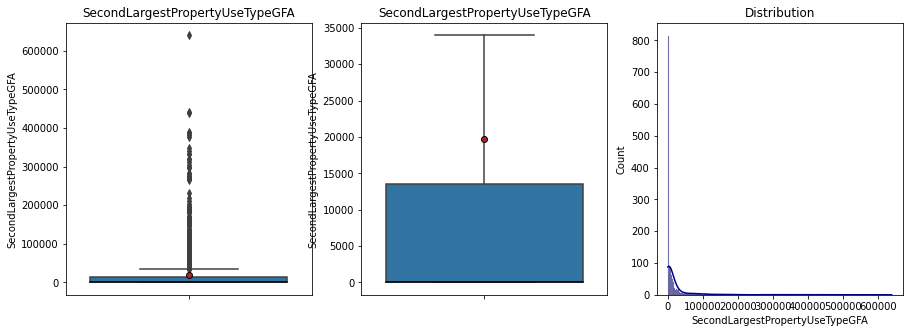

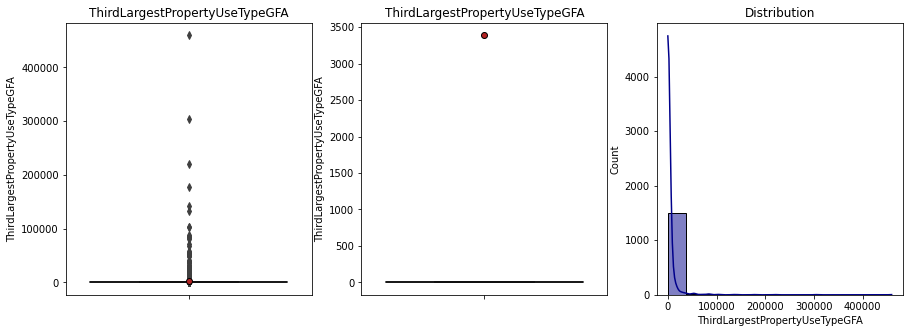

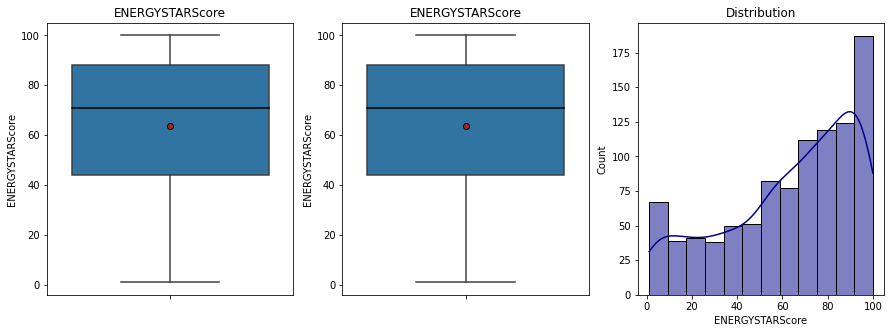

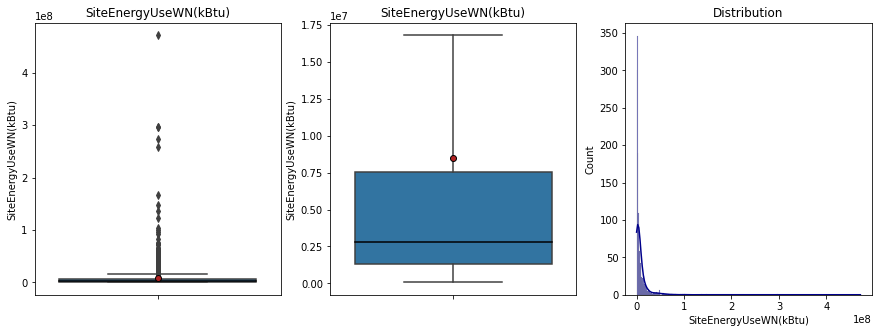

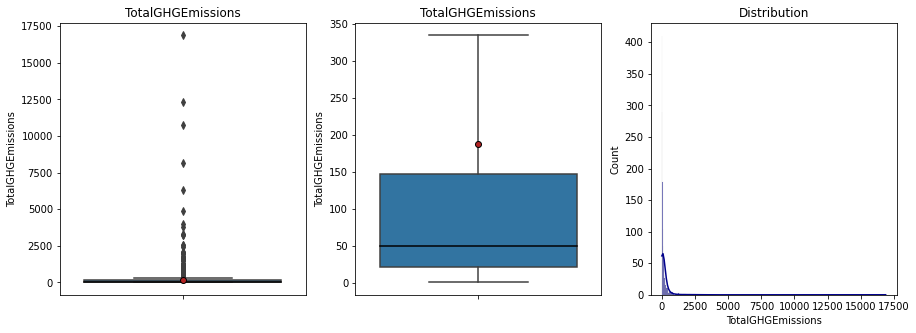

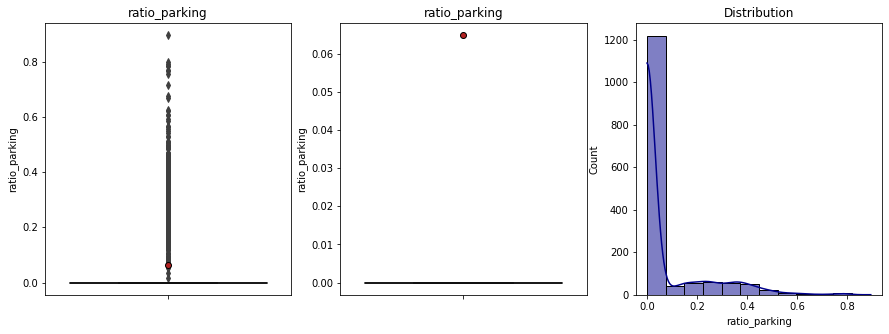

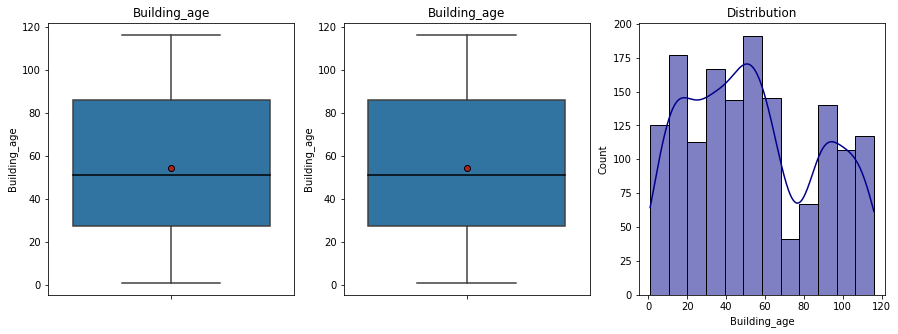

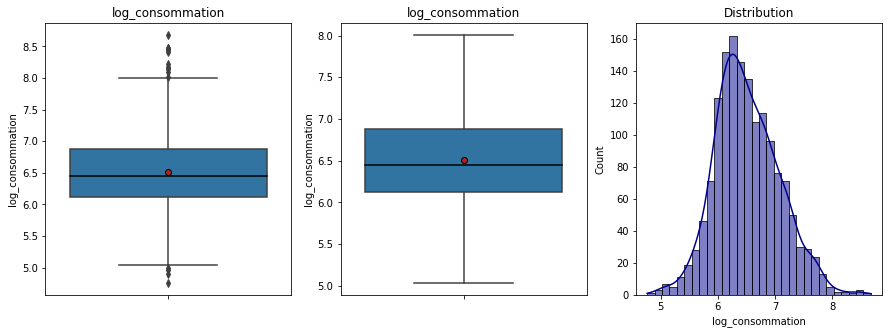

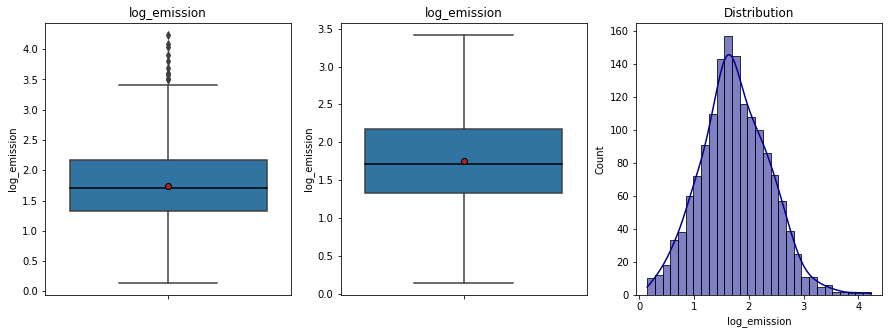

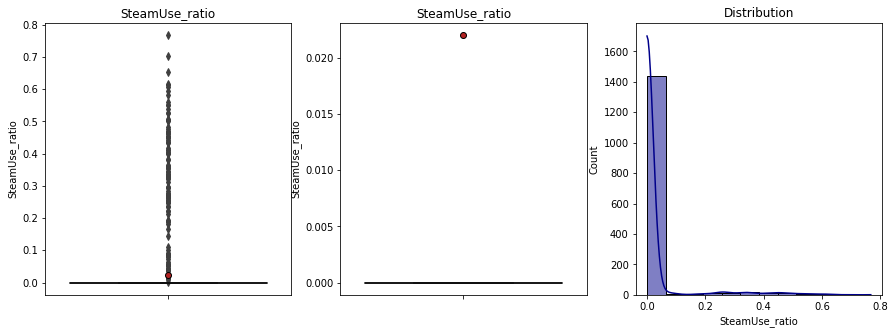

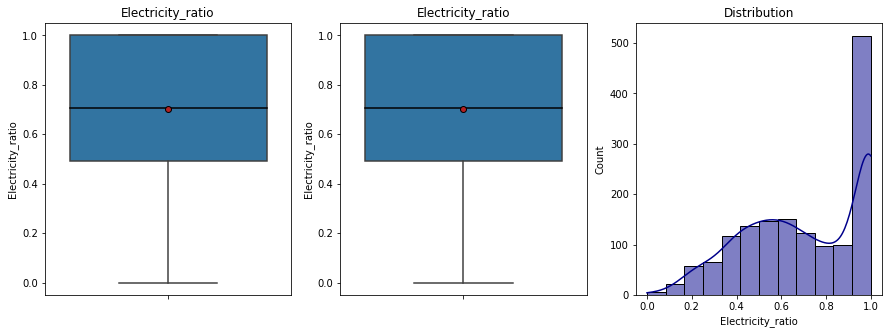

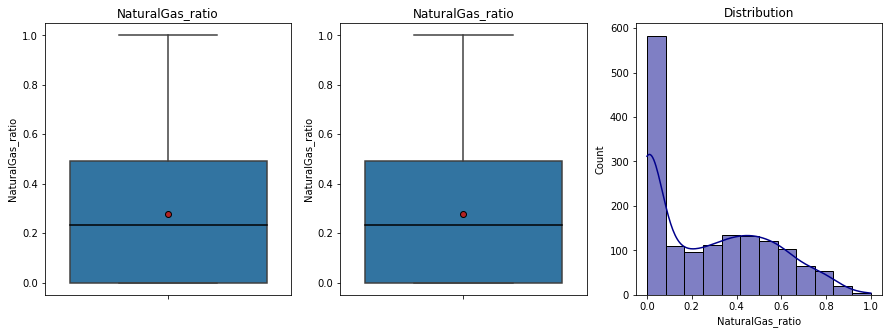

In [91]:
for m in colonnes_numer:
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    # Propriétés graphiques     
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    sns.boxplot( y=data[m], showfliers=True,medianprops=medianprops, showmeans=True, meanprops=meanprops)
    plt.title(m)
    plt.ylabel(m)
    plt.subplot(1,3,2)
    # Propriétés graphiques     
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    sns.boxplot( y=data[m], showfliers=False,medianprops=medianprops, showmeans=True, meanprops=meanprops)
    plt.title(m)
    plt.ylabel(m)

    plt.subplot(1,3,3)
    sns.histplot(data[m], kde = True, color='Darkblue')
    plt.title("Distribution")
    plt.xlabel(m)
    plt.show()

In [92]:
data.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'Latitude',
       'Longitude', 'NumberofFloors', 'PropertyGFABuilding(s)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions',
       'ratio_parking', 'Building_age', 'log_consommation', 'log_emission',
       'SteamUse_ratio', 'Electricity_ratio', 'NaturalGas_ratio'],
      dtype='object')

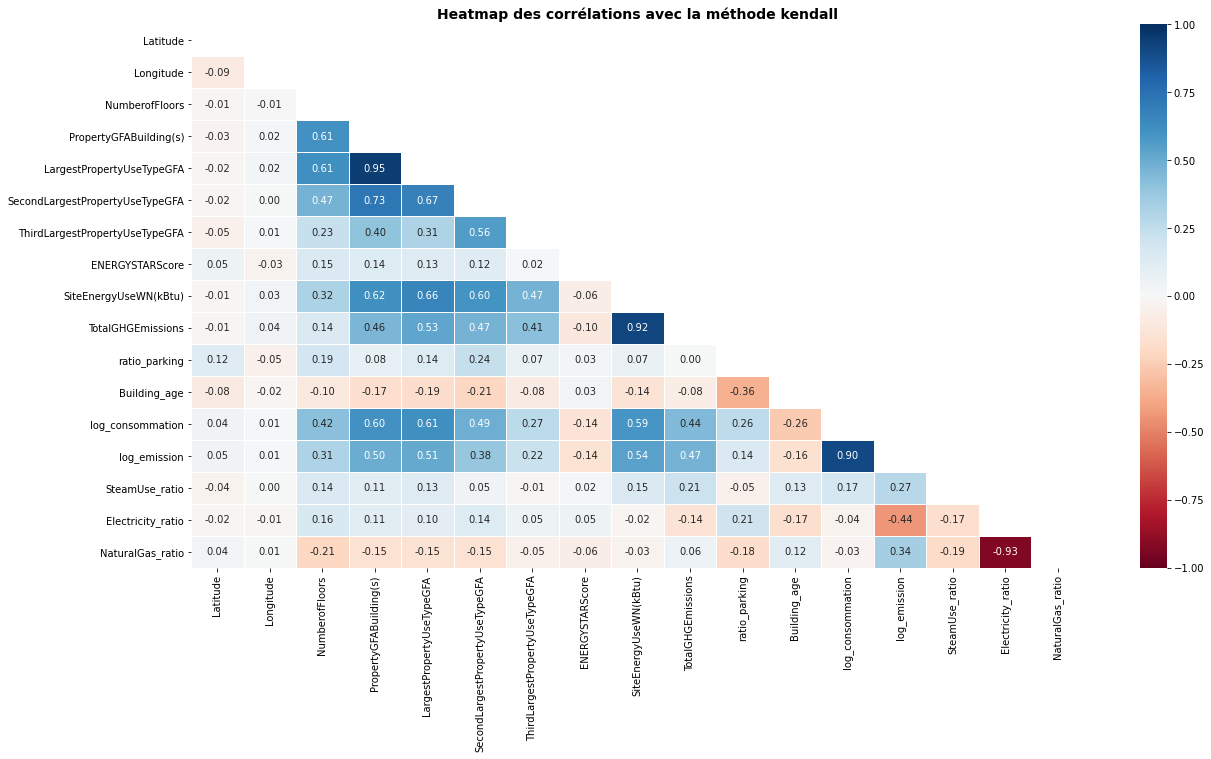

In [93]:
plt.figure(figsize=(20,10))
correlation_matrice(data,'kendall')

#### 11. On observe une corrélation importante entre LargestPropertyUseTypeGFA et PropertyGFABuilding(s) 

Je vais enlever PropertyGFABuilding(s)

<Axes: xlabel='LargestPropertyUseTypeGFA', ylabel='PropertyGFABuilding(s)'>

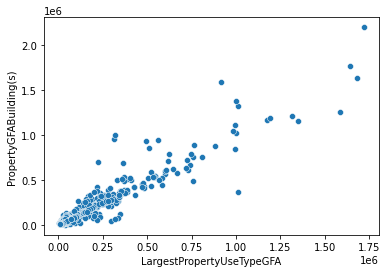

In [94]:
sns.scatterplot(data=data,x='LargestPropertyUseTypeGFA',y='PropertyGFABuilding(s)')

In [95]:
data.drop(columns=['PropertyGFABuilding(s)'],inplace=True)

#### 12. les 2 variables cibles  :

>TotalGHGEmissions renommée en log_emission  
>SiteEnergyUseWN(kBtu) renommée log_consommation  

    
    Elles seront étudiées dans 2 notebooks différents.

In [96]:
data.drop(columns=['TotalGHGEmissions','SiteEnergyUseWN(kBtu)'],inplace=True)

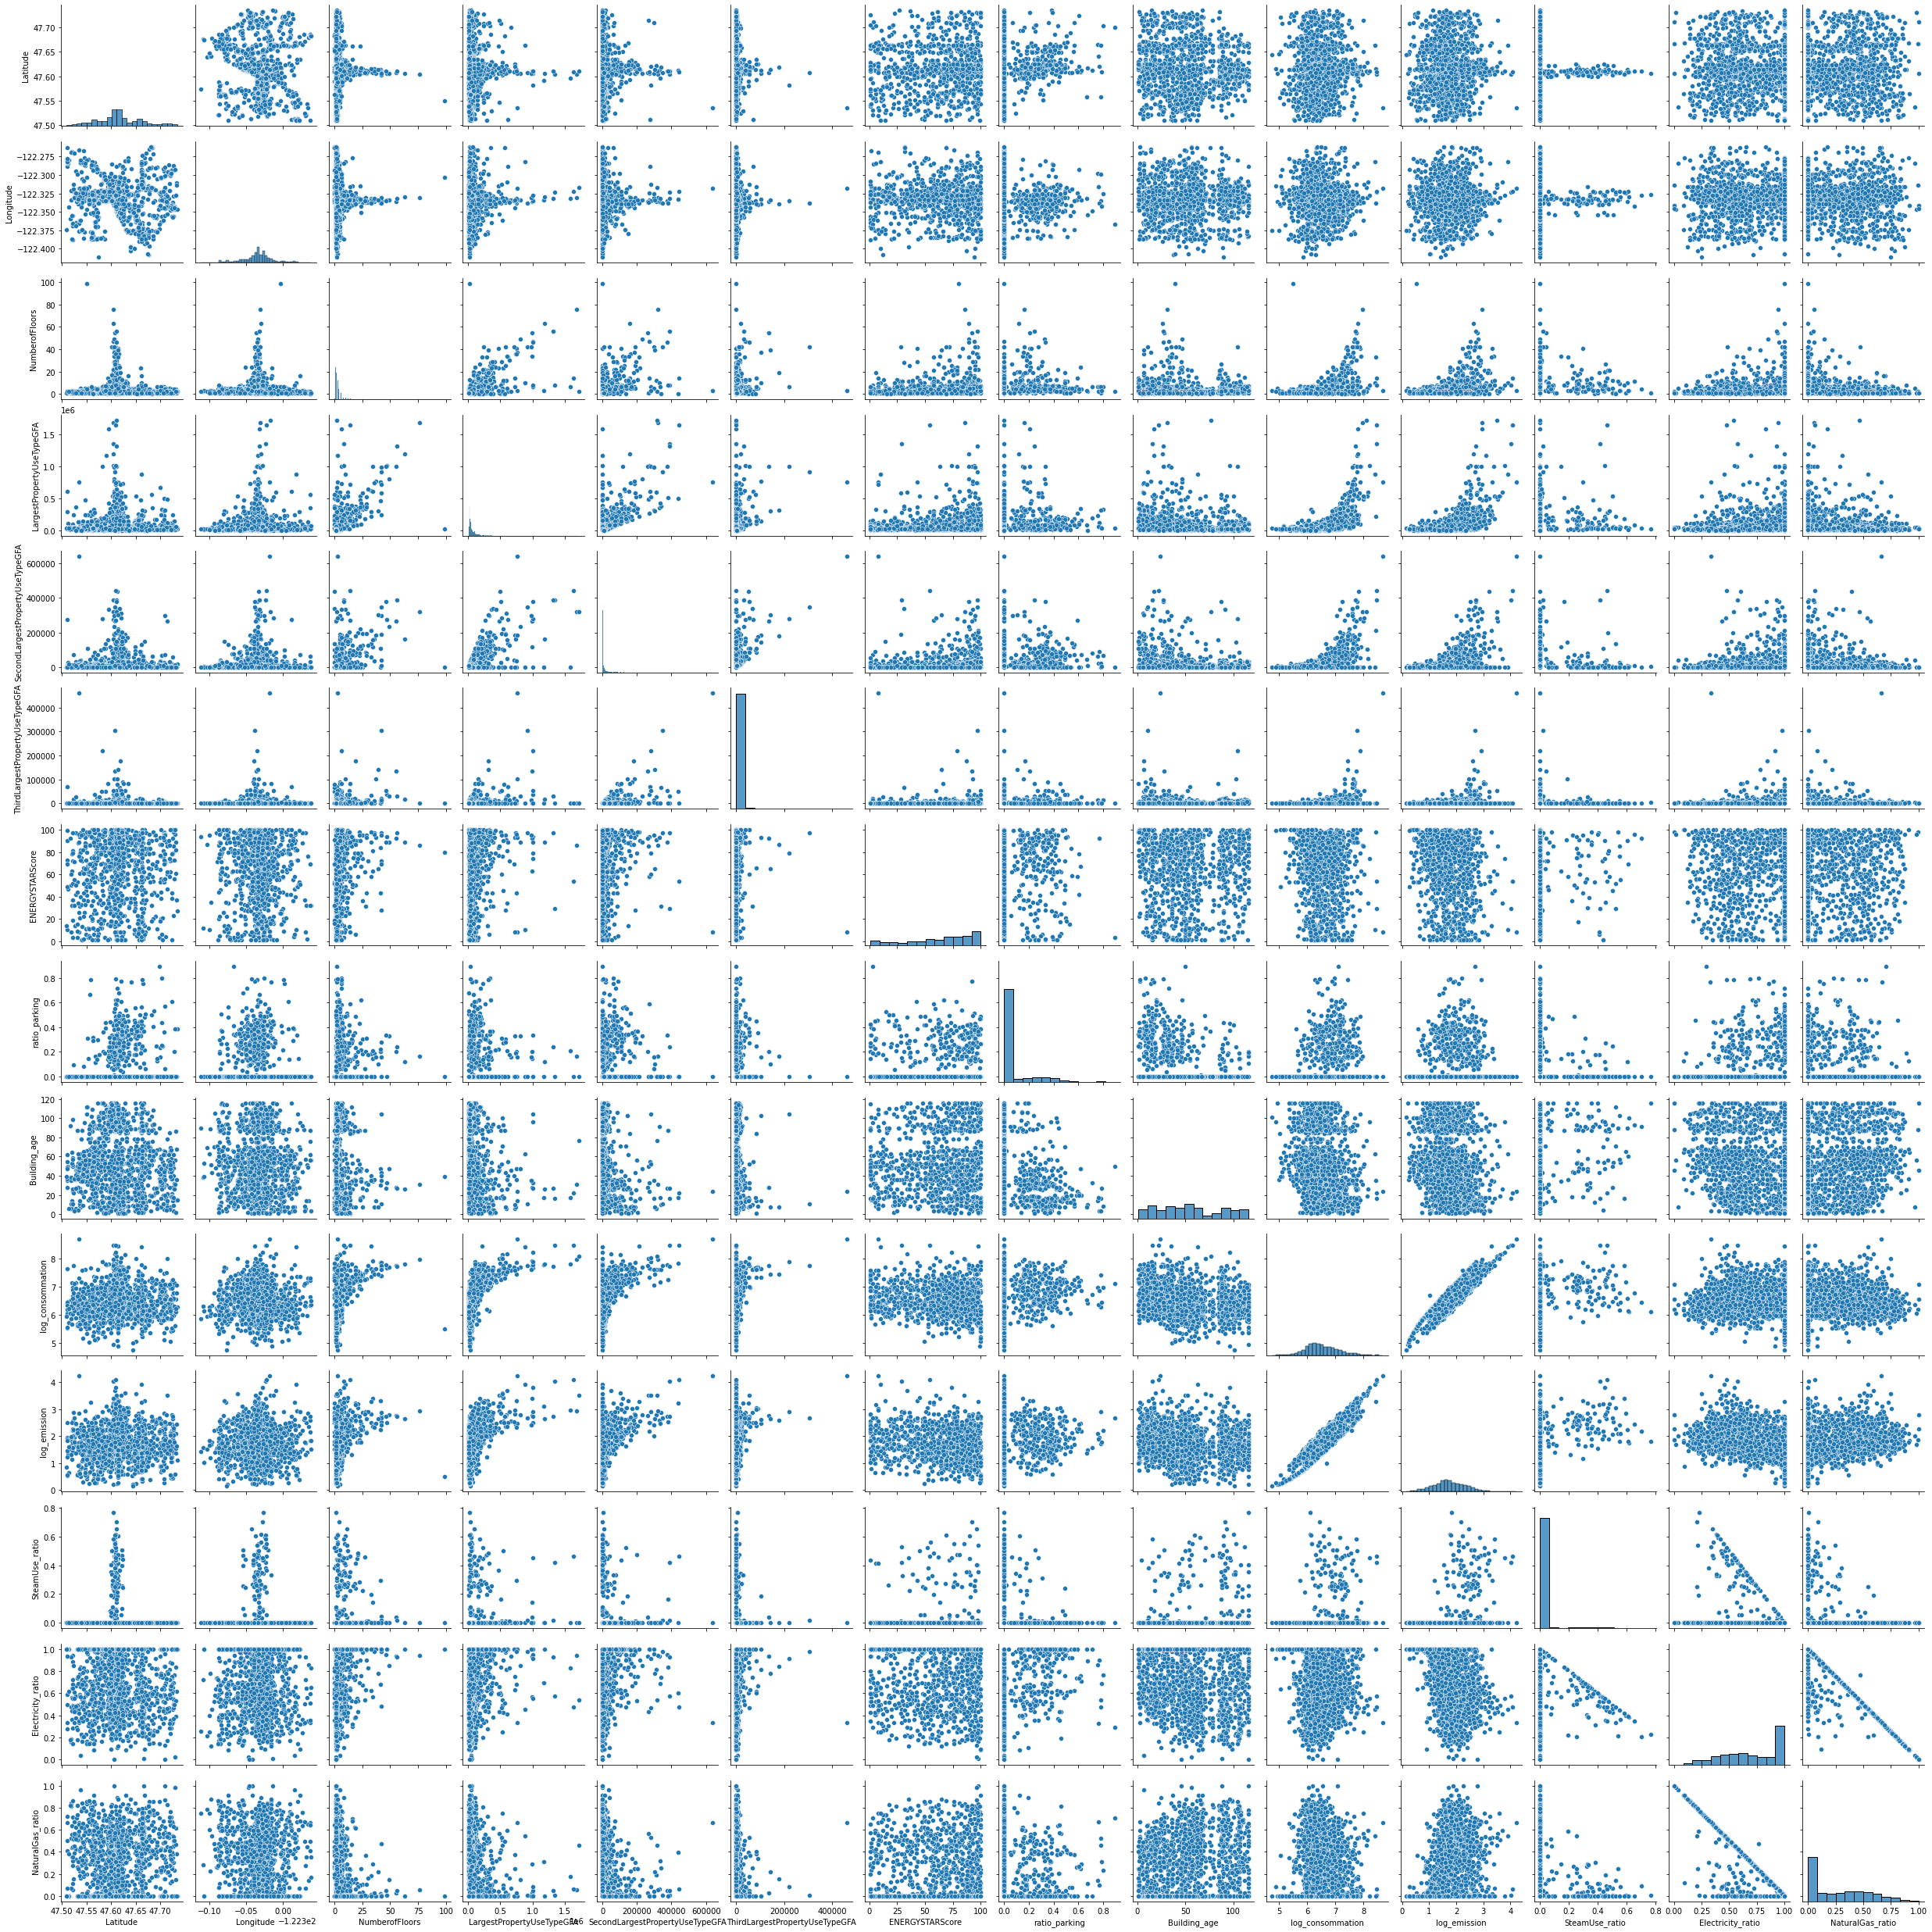

In [97]:
sns.pairplot(data)

<Axes: xlabel='ENERGYSTARScore', ylabel='log_emission'>

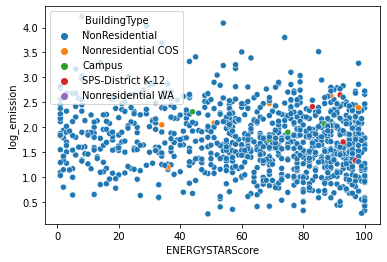

In [98]:
sns.scatterplot(data=data,x='ENERGYSTARScore',y='log_emission',hue='BuildingType')

In [99]:
df=data[data['ENERGYSTARScore'].notna()]

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 987 entries, 0 to 3347
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     987 non-null    object 
 1   PrimaryPropertyType              987 non-null    object 
 2   Neighborhood                     987 non-null    object 
 3   Latitude                         987 non-null    float64
 4   Longitude                        987 non-null    float64
 5   NumberofFloors                   987 non-null    int64  
 6   LargestPropertyUseType           987 non-null    object 
 7   LargestPropertyUseTypeGFA        987 non-null    float64
 8   SecondLargestPropertyUseType     987 non-null    object 
 9   SecondLargestPropertyUseTypeGFA  987 non-null    float64
 10  ThirdLargestPropertyUseType      987 non-null    object 
 11  ThirdLargestPropertyUseTypeGFA   987 non-null    float64
 12  ENERGYSTARScore      

In [101]:
path='C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P4\\cleaned\\'
filename='df_en_star_p4.csv'

In [102]:
df.to_csv(path+filename,index=False)

In [103]:
data.drop(columns=['ENERGYSTARScore'],inplace=True)

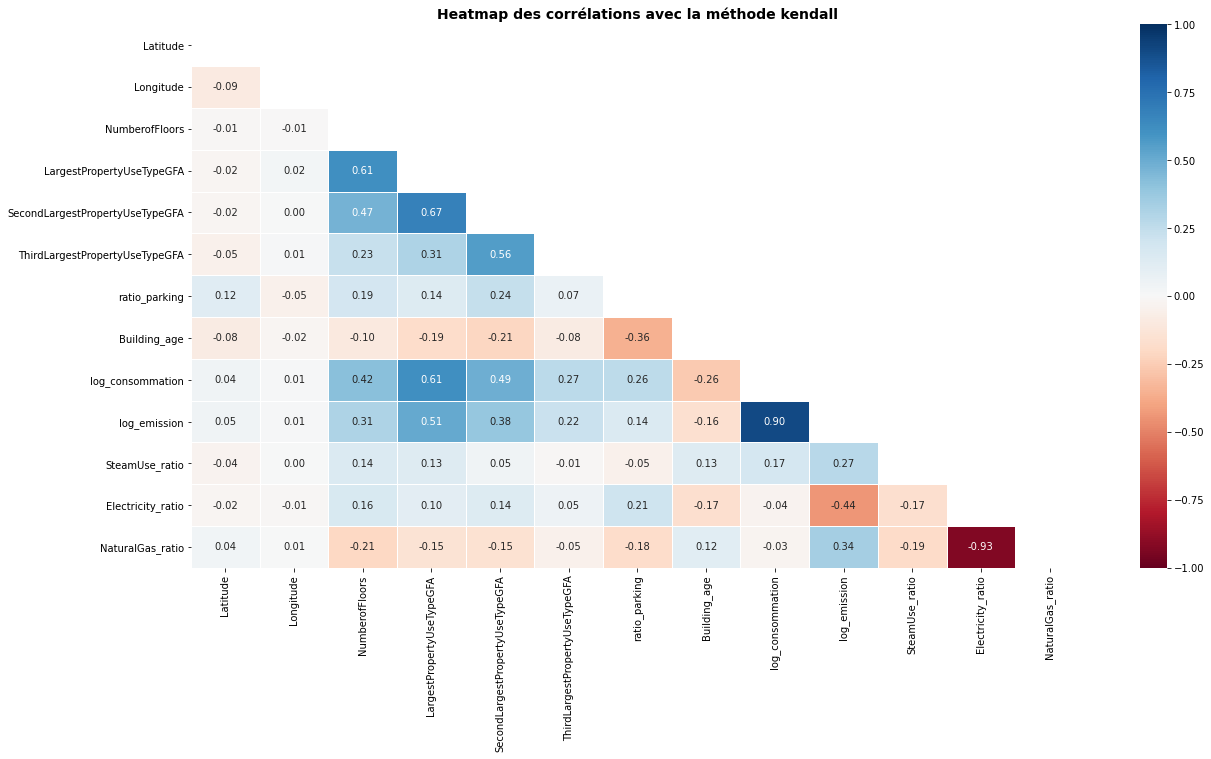

In [104]:
plt.figure(figsize=(20,10))
correlation_matrice(data,'kendall')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 3375
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   BuildingType                     1534 non-null   object 
 1   PrimaryPropertyType              1534 non-null   object 
 2   Neighborhood                     1534 non-null   object 
 3   Latitude                         1534 non-null   float64
 4   Longitude                        1534 non-null   float64
 5   NumberofFloors                   1534 non-null   int64  
 6   LargestPropertyUseType           1534 non-null   object 
 7   LargestPropertyUseTypeGFA        1534 non-null   float64
 8   SecondLargestPropertyUseType     1534 non-null   object 
 9   SecondLargestPropertyUseTypeGFA  1534 non-null   float64
 10  ThirdLargestPropertyUseType      1534 non-null   object 
 11  ThirdLargestPropertyUseTypeGFA   1534 non-null   float64
 12  ratio_parking       

In [106]:
path='C:\\Users\\serge\\OneDrive\\Documents\\Documents\\DATA SCIENTIST\\P4\\cleaned\\'
filename='df_cleaned_p4.csv'

In [107]:
data.to_csv(path+filename,index=False)